# Predict Cancer Levels
## Accuray 100% !

### Importing The Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set()

### Loading The Data

In [25]:
data = pd.read_excel('cancer patient data sets.xlsx')
data.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


### EDA

In [26]:
data.shape

(1000, 25)

In [27]:
cols = data.keys()
cols

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [29]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [30]:
data['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

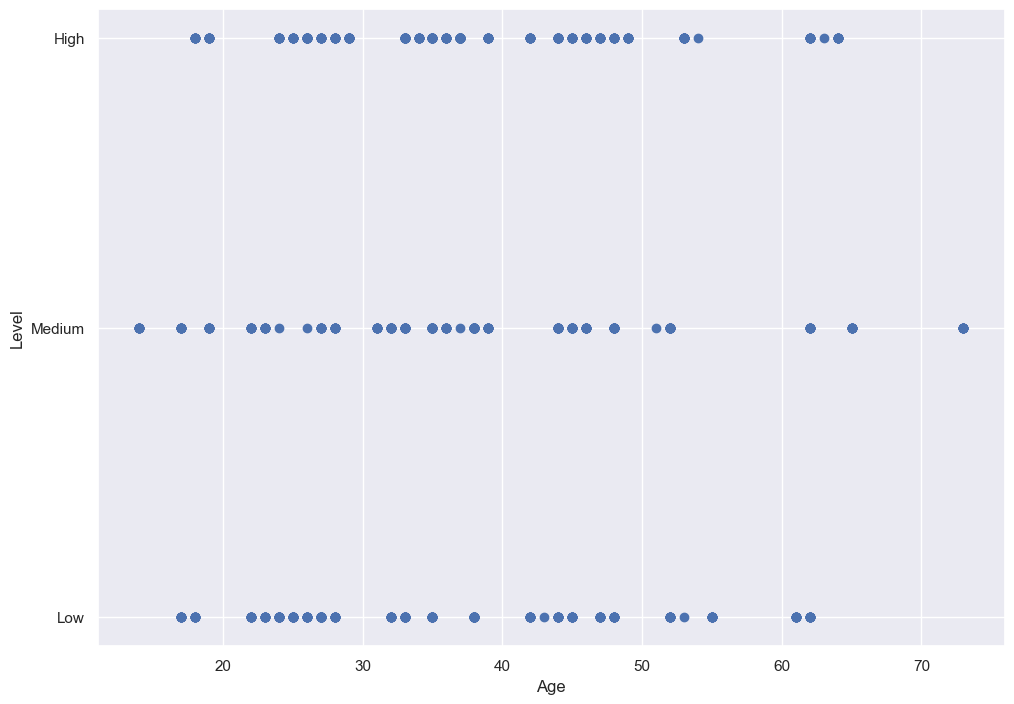

In [31]:
fig , ax = plt.subplots()
ax.scatter(  data['Age'],data['Level'])
ax.set_xlabel("Age")
ax.set_ylabel("Level")
plt.show()

<Axes: xlabel='Level', ylabel='count'>

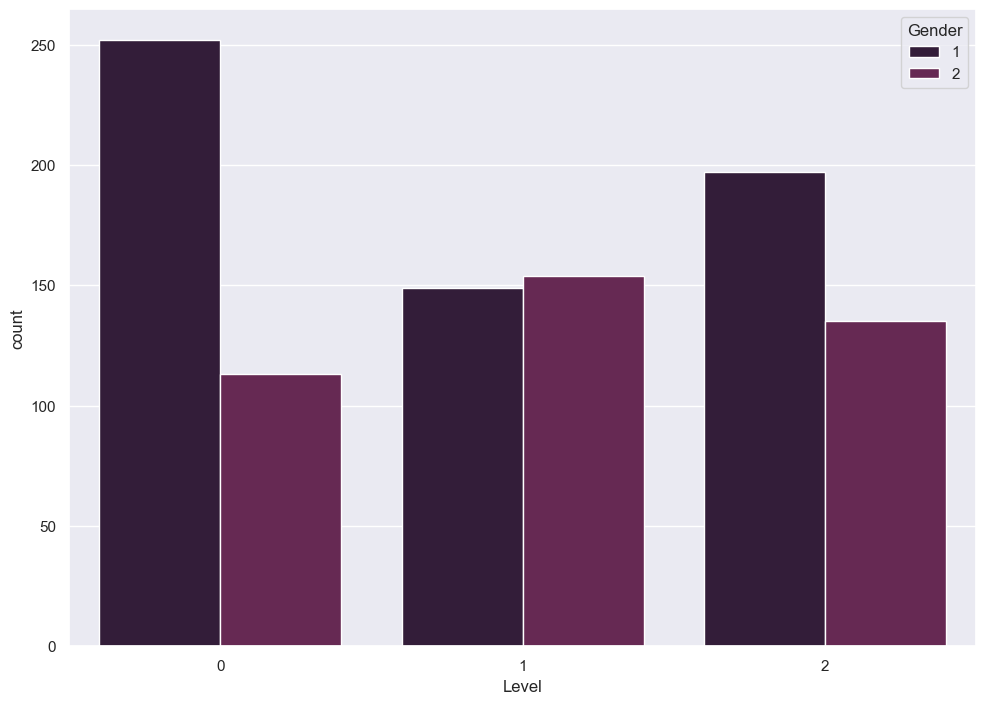

In [50]:
sns.countplot(data=data, x="Level", hue="Gender")

<Axes: >

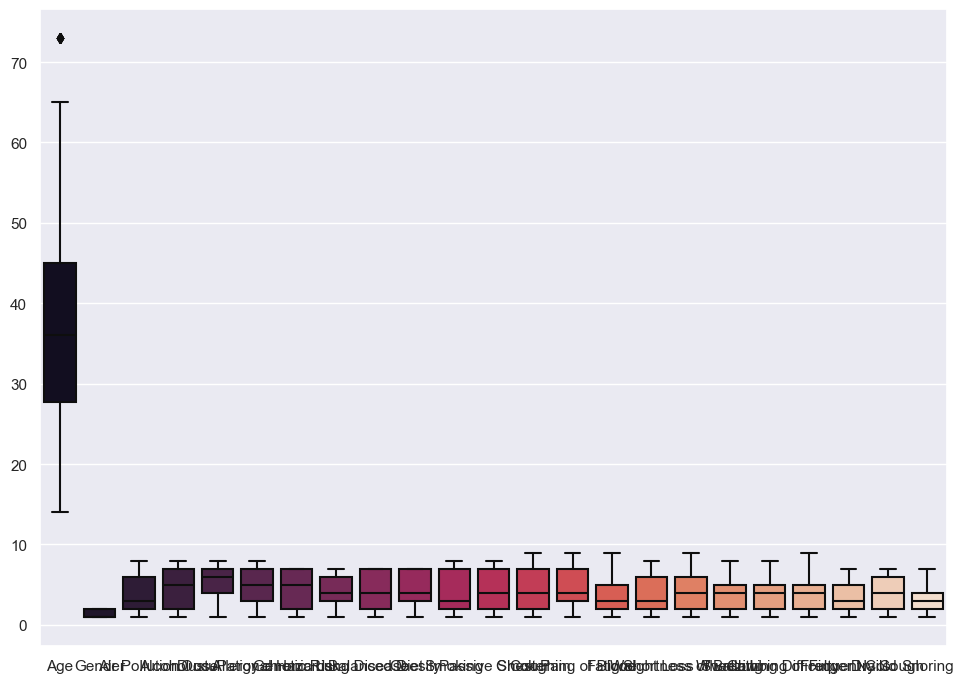

In [32]:
plt.subplots()
sns.boxplot(data, palette= 'rocket')

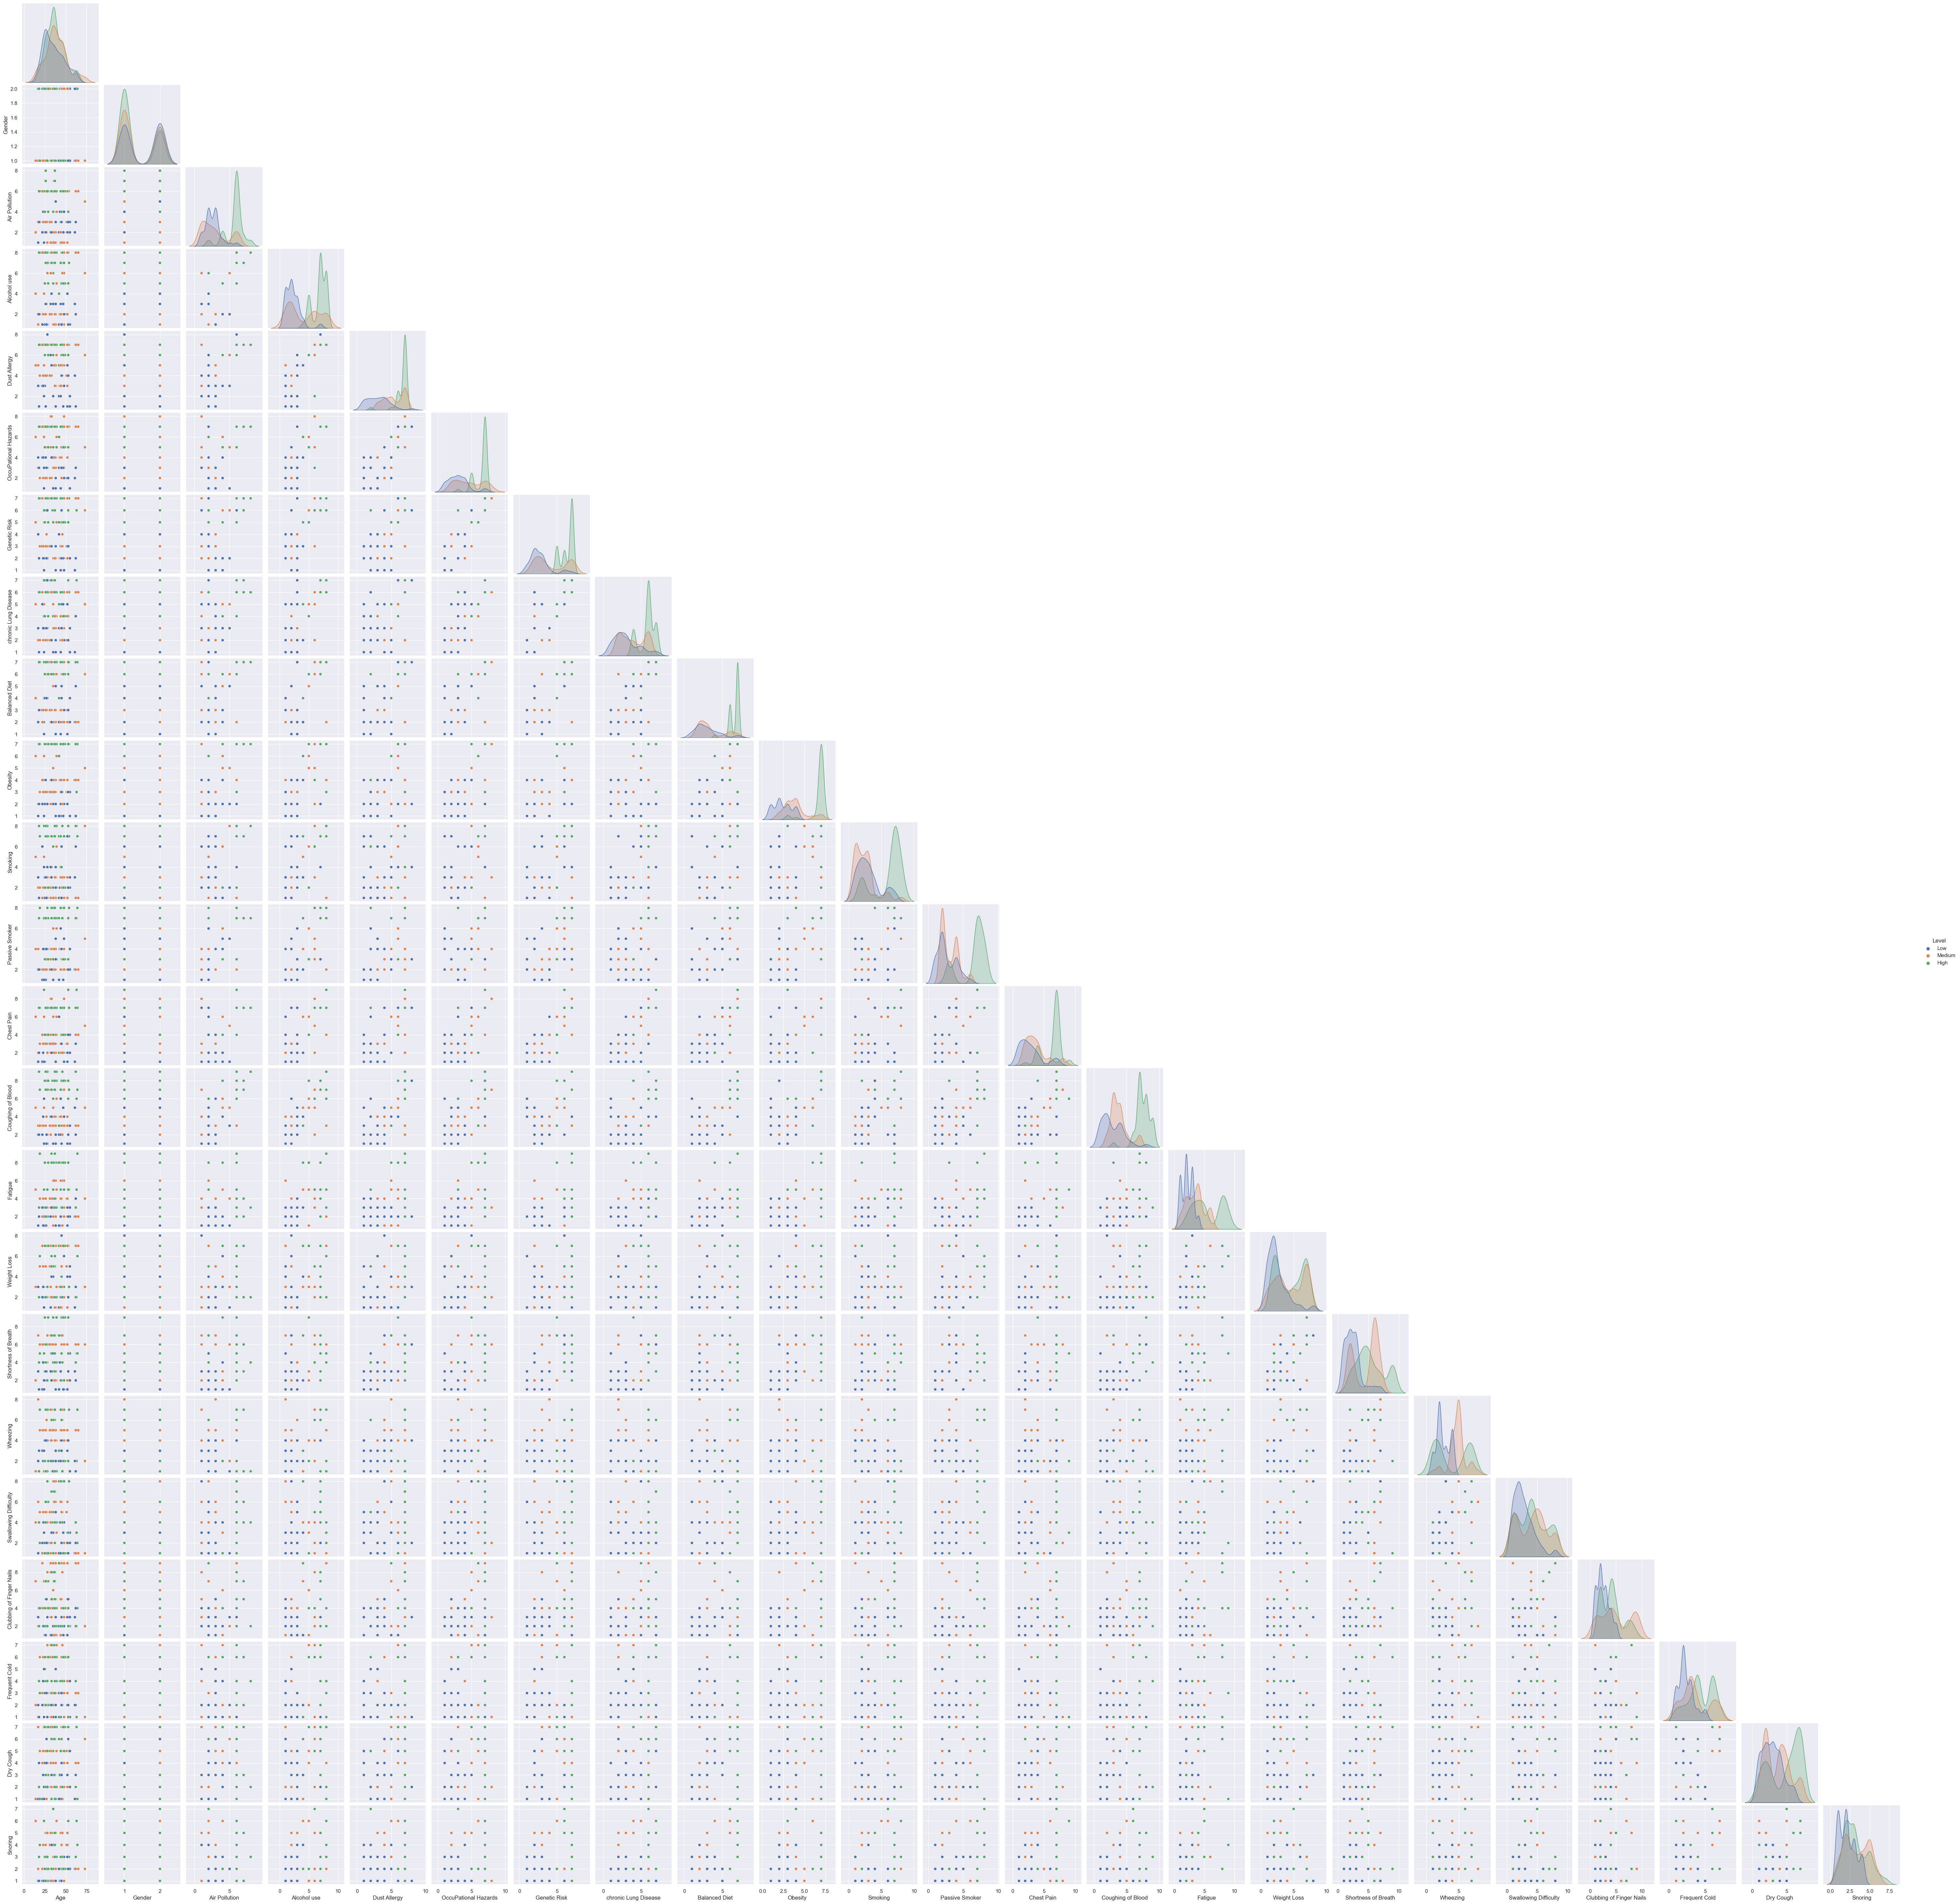

In [33]:
sns.pairplot(data, hue='Level', corner=True)

### Data Cleaning

In [34]:
data.isnull().value_counts().sum()

1000

There is no null values

### Encoding


In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['Level']= encoder.fit_transform(data['Level'])

### Features Selection

In [36]:
data.drop(['Patient Id'],axis=1, inplace=True)

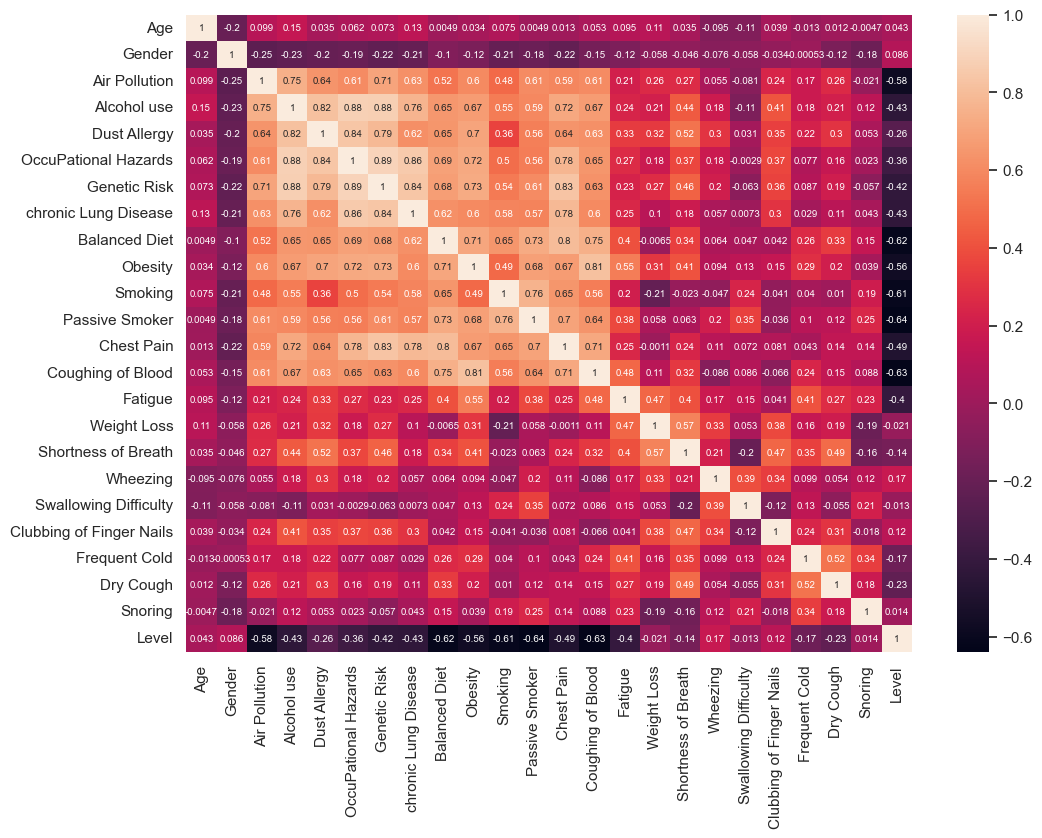

In [37]:
correlation = data.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(correlation,annot=True,cmap="rocket", annot_kws={"size":7})
plt.show()

### Splitting The Data

In [38]:
from sklearn.model_selection import train_test_split

X = data.iloc[: , :-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=42)

### Scaling 

In [39]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train) #Scaling and fitting the training set to a model
X_test_scaled=Scaler.transform(X_test)

### Train The Model

In [40]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

### Accuracy

In [41]:
ypred = classifier.predict(X_test_scaled)

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy: ",result2)

NameError: name 'y_test' is not defined

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay

#sns.set_palette('rocket')

cm = confusion_matrix(y_test, ypred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
sns.set_palette('rocket')
disp.plot()
plt.show()


NameError: name 'y_test' is not defined